In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color=sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings('ignore')

In [56]:
data=pd.read_csv("DATA.csv")
data.head()



# the column default wherther the person is capable of pay back the loan or not.
# when it is no it's signifies that the person is capable of paying back the loan
# when it is yes it's signifies that the person is not capable of paying back the loan.



# the column balance is the outsanding balance it means the amount displayed under that column is to be paid 

# the column income is the monthly income that the persons earns monthly 

,default,student,balance,income
0,No,No,729.53,44361.63
1,No,Yes,817.18,12106.13
2,No,No,1073.55,31767.14
3,No,No,529.25,35704.49
4,No,No,785.66,38463.50


In [57]:
data.shape

(10000, 4)

In [4]:
data.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374877,33516.981852
std,483.714957,13336.639582
min,0.000000,771.970000
25%,481.732500,21340.460000
50%,823.635000,34552.645000
75%,1166.305000,43807.730000
max,2654.320000,73554.230000


In [5]:
import statistics

In [6]:
median=statistics.median(data['balance'])

median


823.635

In [7]:
variance=statistics.variance(data['balance'])
variance

233980.15975055992

In [8]:
variance=statistics.variance(data['income'])
variance

177865955.3494443

In [9]:
mode=statistics.mode(data['balance'])
mode

0.0

In [10]:
median=statistics.median(data['income'])
median

34552.645000000004

In [11]:
mode=statistics.mode(data['income'])
mode

11905.68

# exploratory data analysis 

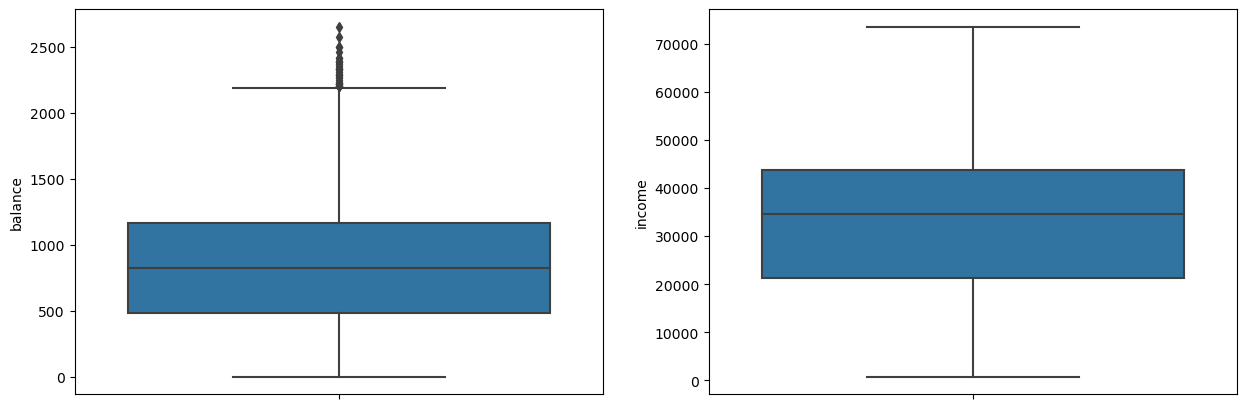

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(y=data['balance'])

plt.subplot(1,2,2)
sns.boxplot(y=data['income'])
plt.show()



# from balance boxplot we can signifies that > the minimum balance iss Zero and the maximum balance is above 2500
# > some of the outliers are present in our balance data which is clearly shown the points which are above the 100 percentile.
# > interquartile range q3-q1


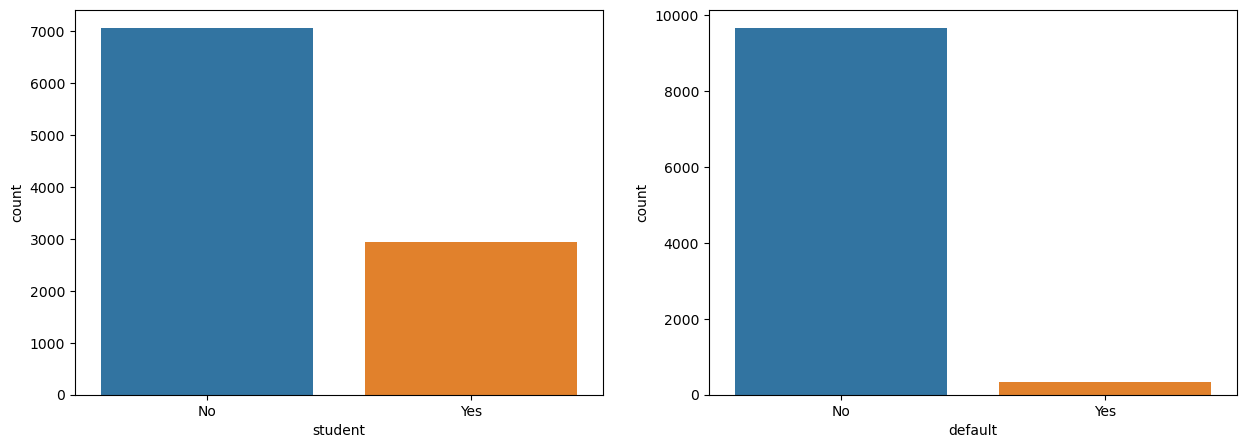

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data['student'])

plt.subplot(1,2,2)
sns.countplot(data['default'])
plt.show()

In [14]:
data['student'].value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [15]:
data['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [16]:
data['student'].value_counts(normalize=True)

No     0.7056
Yes    0.2944
Name: student, dtype: float64

In [17]:
data['default'].value_counts(normalize=True)

No     0.9667
Yes    0.0333
Name: default, dtype: float64

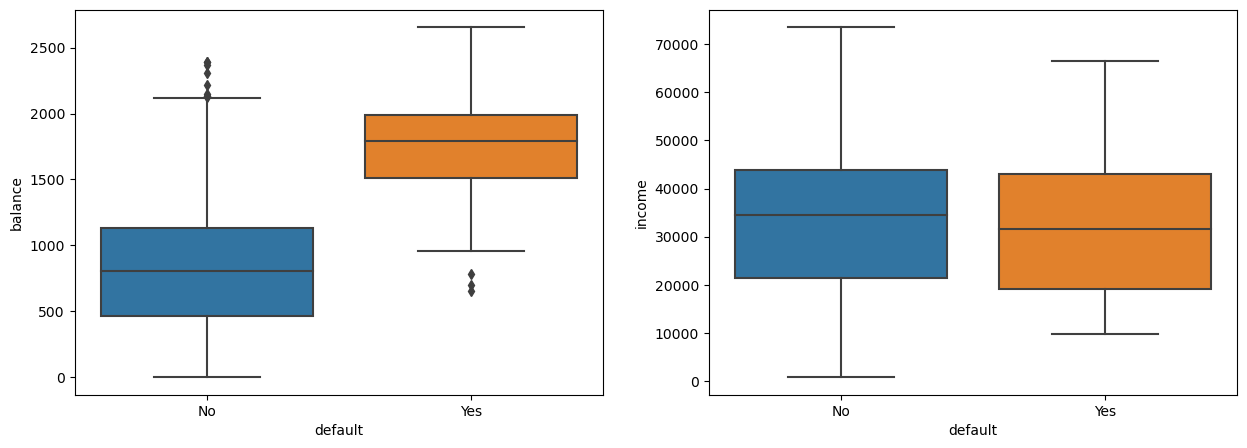

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data['default'], data['balance'])

plt.subplot(1,2,2)
sns.boxplot(data['default'], data['income'])
plt.show()

In [19]:
pd.crosstab(data['student'], data['default'], normalize='index').round(2)



# the output says that if the person is not students then 97% chance that he/she is not a defaulter.
# if the person is not students then 3% chance is there that he/she is a defaulter
# if the person is a students then 96% chance is there that he/she is not a defaulter
# if the person is a students then 4% chance is there that he/she is deafulter

default,No,Yes
student,,
No,0.97,0.03
Yes,0.96,0.04


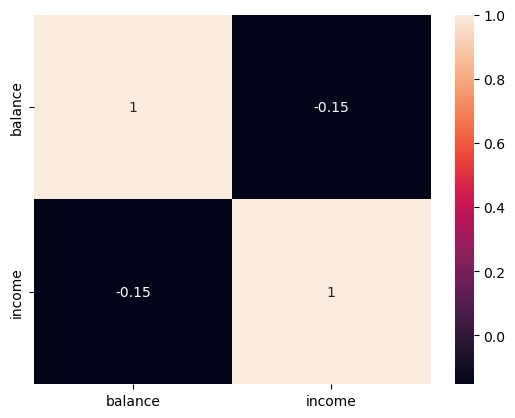

In [20]:
sns.heatmap(data[['balance', 'income']].corr(), annot=True)
plt.show()

In [21]:
data.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

In [22]:
Q1,Q3=data['balance'].quantile([.25,.75])
IQR=Q3-Q1
LL=Q1-1.5*(IQR)
UL=Q3+1.5*(IQR)

In [23]:
UL

2193.16375

In [24]:
df=data[data['balance']>UL]

In [25]:
df

,default,student,balance,income
173,Yes,Yes,2205.80,14271.49
1136,Yes,No,2499.02,51504.29
1160,Yes,Yes,2502.68,14947.52
1359,Yes,No,2220.97,40725.10
1502,Yes,Yes,2332.88,11770.23
1609,Yes,Yes,2269.95,18021.11
2096,Yes,Yes,2261.85,20030.17
2140,No,Yes,2308.89,19110.27
2929,Yes,Yes,2387.31,28296.91
3162,Yes,Yes,2415.32,17429.50


In [26]:
df['default'].count()

31

In [27]:
df['default'].value_counts(normalize=True)

Yes    0.83871
No     0.16129
Name: default, dtype: float64

In [28]:
df['default'].value_counts()

Yes    26
No      5
Name: default, dtype: int64

In [29]:
data['balance']=np.where(data['balance'] > UL, UL, data['balance'])

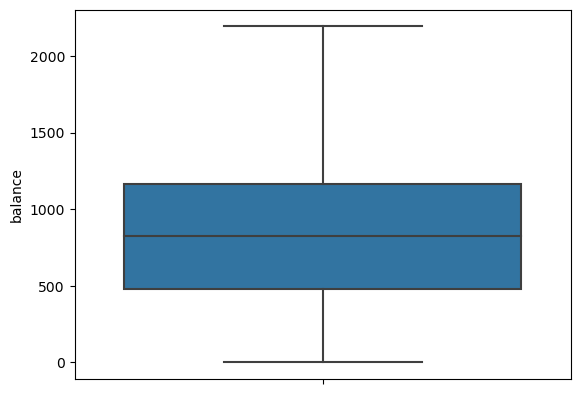

In [30]:
sns.boxplot(y=data['balance'])
plt.show()

In [31]:
# transform the  categorical varibale into binary from (0 and 1)   for NO=0 and YES=1
data=pd.get_dummies(data, drop_first=True)

In [32]:
data.head()

,balance,income,default_Yes,student_Yes
0,729.53,44361.63,0,0
1,817.18,12106.13,0,1
2,1073.55,31767.14,0,0
3,529.25,35704.49,0,0
4,785.66,38463.50,0,0


In [33]:
data.columns=['balance','income','default', 'student']

In [34]:
data.head()

,balance,income,default,student
0,729.53,44361.63,0,0
1,817.18,12106.13,0,1
2,1073.55,31767.14,0,0
3,529.25,35704.49,0,0
4,785.66,38463.50,0,0


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X=data.drop('default', axis=1)
y=data['default']

In [37]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=21, stratify=y) 

In [38]:
print(X_train.shape)
print(X_test.shape)

(7000, 3)
(3000, 3)


In [39]:
print(y_train.value_counts(normalize=True).round(2))

0    0.97
1    0.03
Name: default, dtype: float64


In [40]:
print(y_test.value_counts(normalize=True). round(2))

0    0.97
1    0.03
Name: default, dtype: float64


In [41]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [42]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=33, sampling_strategy=0.75)
X_res, y_res=sm.fit_resample(X_train, y_train)

In [43]:
from sklearn.linear_model import LogisticRegression 

In [44]:
lr=LogisticRegression()

In [45]:
lr.fit(X_res,y_res)

LogisticRegression()

In [46]:
y_pred=lr.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix, classification_report

In [48]:
print(confusion_matrix(y_test,y_pred))

[[2589  311]
 [  25   75]]


In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      2900
           1       0.19      0.75      0.31       100

    accuracy                           0.89      3000
   macro avg       0.59      0.82      0.62      3000
weighted avg       0.96      0.89      0.92      3000



In [50]:
pip install pipreqs

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [51]:
pip install nbconvert

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [54]:
pip install session-info

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 63.5/63.5 kB 380.5 kB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8037 sha256=533783231838bfe0248ff74e52405a968063dd61b87d0efa04cb6efd865a2a58
  Stored in directory: c:\users\susanta\appdata\local\pip\cache\wheels\d4\fc\2e\00ca60bac7954b84907efd41baa9b4853500eaeec4228410c6
Successfully built session-info
Note: you may need to restart the kernel to use updated packages.


In [55]:
import session_info
session_info.show()